# Polly Test Evaluation over Gentoo Projects

This experiment ran over a series of gentoo projects in 4 different configuration of Polly. All statistic variables
have been extracted and are available for analysis in the dataset. The dataset is cleaned from all anomalies
including breaking projects.

    - -O3 -polly
    - -O3 -polly -polly-position=before-vectorizer
    - -O3 -polly -polly-position=before-vectorizer -polly-process-unprofitable
    - -O3 -polly -polly-process-unprofitable

# Update Dataset from Database

If you have access to benchbuild's database you can update the dataset from the database directly. This should also be used, if a new experiment has been conducted (the UUID will be different). If you
do not have access to a benchbuild database, you can simply skip this region and use the dataset that is provided with this notebook.

In [88]:
import uuid
import benchbuild.settings as settings
import benchbuild.utils.schema as schema
import pandas as pd
import sqlalchemy as sa

exp_ids = [uuid.UUID("6c9d1f23-d9ee-4744-88ea-243dcaa50cd4")]
stat_components = ["polly-scops", "polly-detect"]
out_path = './data/pollytest-6c9d1f23-d9ee-4744-88ea-243dcaa50cd4.csv'

settings.CFG.load(".benchbuild.dbms.yml")
session = schema.Session()
QUERY_EVAL = \
    sa.sql.select([
        sa.column('project'),
        sa.column('variable'),
        sa.column('metric'),
        sa.column('value')
    ]).\
    select_from(
        sa.func.pollytest_eval_melted(
            sa.sql.bindparam('exp_ids'),
            sa.sql.bindparam('components')))
qry = QUERY_EVAL.unique_params(exp_ids=exp_ids,
                               components=stat_components)
df = pd.read_sql_query(qry, session.bind)
df.to_csv(out_path)
print(df.head())

                   project    variable  \
0  app-accessibility_flite  -O3 -polly   
1  app-accessibility_flite  -O3 -polly   
2  app-accessibility_flite  -O3 -polly   
3  app-accessibility_flite  -O3 -polly   
4  app-accessibility_flite  -O3 -polly   

                                              metric  value  
0                   Maximal number of loops in scops     42  
1  Maximal number of loops in scops (profitable s...     18  
2              Number of aliasing assumptions taken.      8  
3           Number of error block assumptions taken.      8  
4       Number of invariant loads assumptions taken.      2  


# Update Dataset from File

If you lack access to the database, please use the existing data in .csv format below.

In [5]:
import pandas as pd
import os

csv_path = './data/pollytest-6c9d1f23-d9ee-4744-88ea-243dcaa50cd4.csv'
df = pd.DataFrame()
if os.path.exists(csv_path):
    df = pd.read_csv(csv_path)
df.head()

,Unnamed: 0,project,variable,metric,value
0,0,app-accessibility_flite,-O3 -polly,Maximal number of loops in scops,42
1,1,app-accessibility_flite,-O3 -polly,Maximal number of loops in scops (profitable s...,18
2,2,app-accessibility_flite,-O3 -polly,Number of aliasing assumptions taken.,8
3,3,app-accessibility_flite,-O3 -polly,Number of error block assumptions taken.,8
4,4,app-accessibility_flite,-O3 -polly,Number of invariant loads assumptions taken.,2


## Available configurations

In [7]:
configs = df['variable'].unique()
configs

array(['-O3 -polly', '-O3 -polly -polly-position=before-vectorizer',
       '-O3 -polly -polly-position=before-vectorizer -polly-process-unprofitable',
       '-O3 -polly -polly-process-unprofitable'], dtype=object)

## Available metrics

In [6]:
metrics = df['metric'].unique()
metrics

array(['Maximal number of loops in scops',
       'Maximal number of loops in scops (profitable scops only)',
       'Number of aliasing assumptions taken.',
       'Number of error block assumptions taken.',
       'Number of invariant loads assumptions taken.',
       'Number of loops in scops',
       'Number of loops in scops (profitable scops only)',
       'Number of rejected regions: Assumed to be unprofitable',
       'Number of rejected regions: Base address aliasing',
       'Number of rejected regions: Function call with side effects',
       'Number of rejected regions: Non-affine branch condition',
       'Number of rejected regions: Non-integer branch condition',
       'Number of rejected regions: Uncomputable loop bounds',
       'Number of rejected regions: Variant base pointer',
       'Number of scops', 'Number of Scops containing a loop',
       'Number of scops (profitable scops only)',
       'Number of scops with maximal loop depth 1',
       'Number of scops wit

# Data analysis

## Per metric

In [10]:
m_data_scops = df.loc[df.metric == 'Number of valid Scops']
m_data_scops_w_loop = df.loc[df.metric == 'Number of Scops containing a loop']

merged = m_data_scops.append(m_data_scops_w_loop, ignore_index=True)

#pd.pivot_table(merged, index='project', columns=['metric', 'variable'], values='value')
merged

,Unnamed: 0,project,variable,metric,value
0,25,app-accessibility_flite,-O3 -polly,Number of valid Scops,5
1,52,app-accessibility_flite,-O3 -polly -polly-position=before-vectorizer,Number of valid Scops,3
2,85,app-accessibility_flite,-O3 -polly -polly-position=before-vectorizer -...,Number of valid Scops,299
3,115,app-accessibility_flite,-O3 -polly -polly-process-unprofitable,Number of valid Scops,277
4,166,app-accessibility_nfbtrans,-O3 -polly -polly-position=before-vectorizer -...,Number of valid Scops,96
5,192,app-accessibility_nfbtrans,-O3 -polly -polly-process-unprofitable,Number of valid Scops,82
6,218,app-admin_dio,-O3 -polly -polly-position=before-vectorizer -...,Number of valid Scops,1
7,233,app-admin_dio,-O3 -polly -polly-process-unprofitable,Number of valid Scops,2
8,270,app-admin_fetchlog,-O3 -polly -polly-position=before-vectorizer -...,Number of valid Scops,5
9,291,app-admin_fetchlog,-O3 -polly -polly-process-unprofitable,Number of valid Scops,5


In [12]:
from altair import Chart, X, Y, Column, Color, Axis, Scale

table_chart = Chart(merged).mark_bar(stacked='normalize').encode(
    x = X('value', scale = Scale(domain=(0, 200), clamp=True)),
    y = Y('project:N', axis = Axis(title = "Project")),
    column = Column('variable', axis = Axis(orient = "top", labelAngle = -45.0, labelAlign = "left", title = "Configuration")),
    color = Color('metric')
).configure_facet_cell(
    strokeWidth=0.0
)

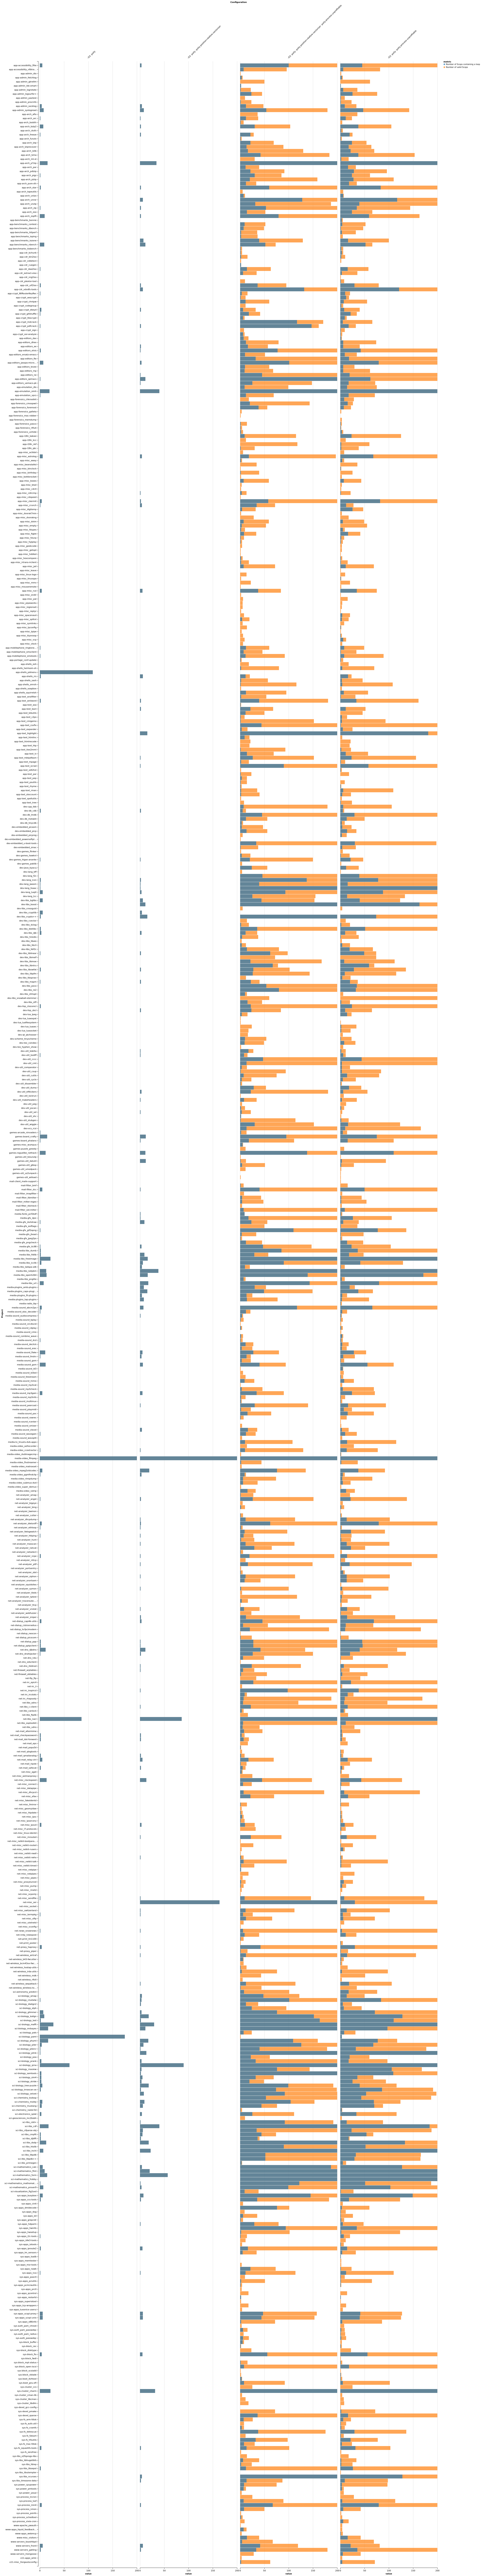

In [13]:
table_chart